<a href="https://colab.research.google.com/github/ankitojha2705/advanced-dimensionality-reduction/blob/main/dimensionality_reduction_using_data_bricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
labVersion = 'cs120.1x-lab4-1.0.5'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_plot(xticks, yticks, figsize=(10.5, 6), hide_labels=False, grid_color='#999999',
                 grid_width=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hide_labels: axis.set_ticklabels([])
    plt.grid(color=grid_color, linewidth=grid_width, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

def create_2D_gaussian(mn, variance, cov, n):
    """Randomly sample points from a two-dimensional Gaussian distribution"""
    np.random.seed(142)
    return np.random.multivariate_normal(np.array([mn, mn]), np.array([[variance, cov], [cov, variance]]), n)

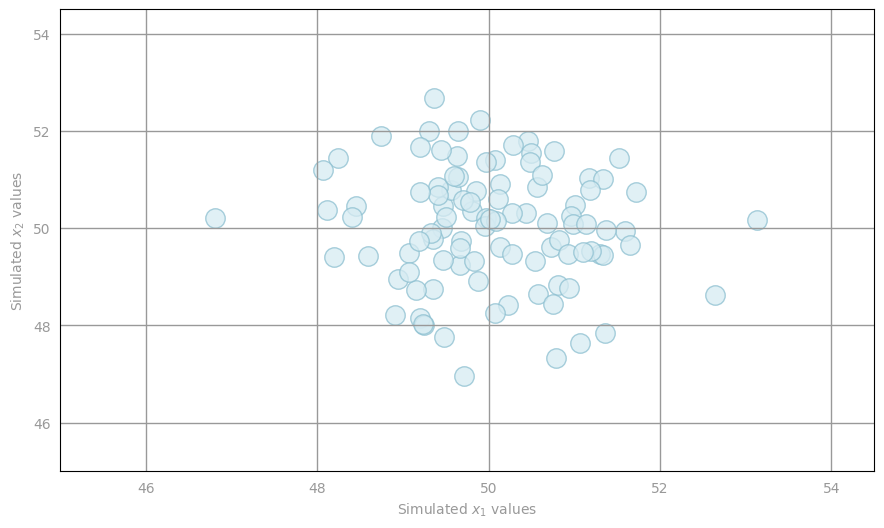

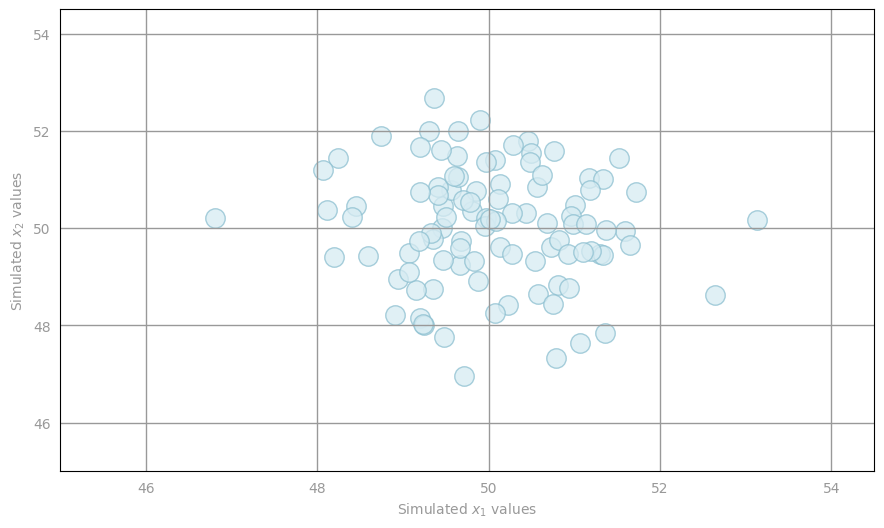

In [ ]:
data_random = create_2D_gaussian(mn=50, variance=1, cov=0, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45, 54.5), ax.set_ylim(45, 54.5)
plt.scatter(data_random[:,0], data_random[:,1], s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
display(fig)

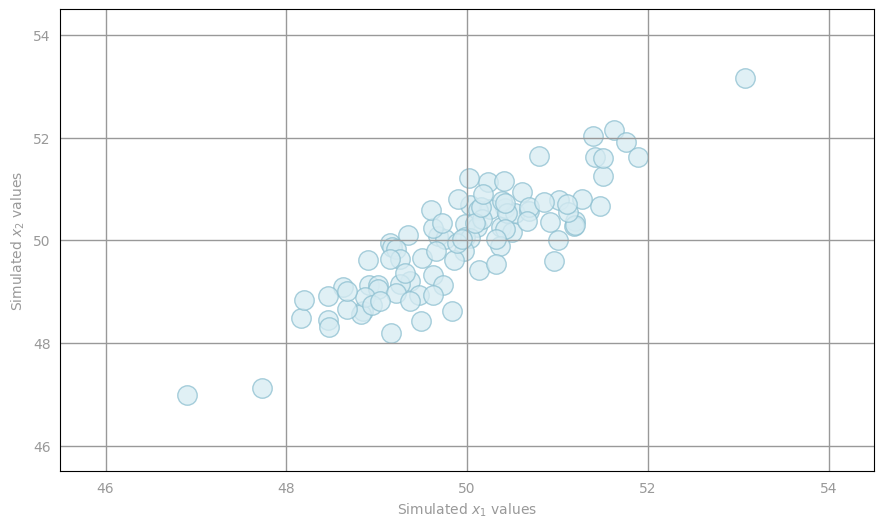

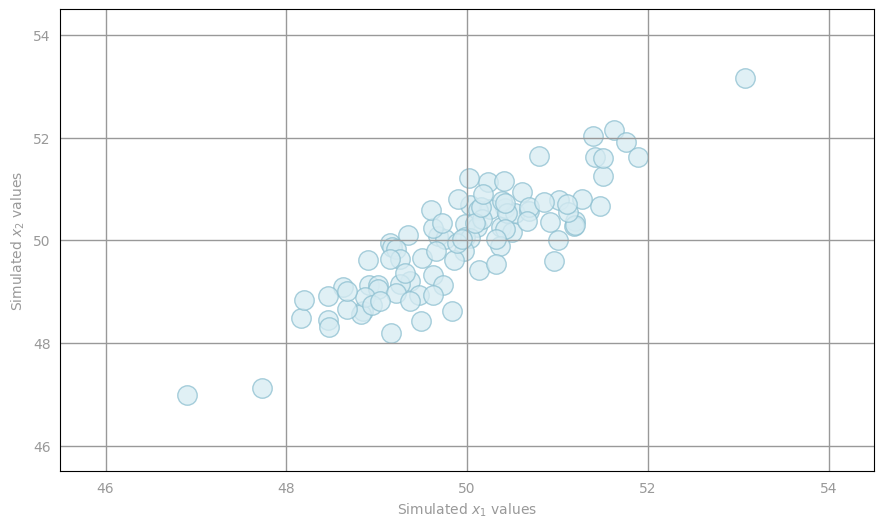

In [ ]:
data_correlated = create_2D_gaussian(mn=50, variance=1, cov=.9, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45.5, 54.5), ax.set_ylim(45.5, 54.5)
plt.scatter(data_correlated[:,0], data_correlated[:,1], s=14**2, c='#d6ebf2',
            edgecolors='#8cbfd0', alpha=0.75)
display(fig)

In [ ]:
# Import SparkContext
from pyspark import SparkContext

# Get or create a SparkContext
# If a SparkContext already exists, it will be reused.
# Otherwise, a new one will be created.
sc = SparkContext.getOrCreate()


# TODO: Replace <FILL IN> with appropriate code
correlated_data = sc.parallelize(data_correlated)

#mean_correlated = <FILL IN>
mean_correlated = correlated_data.mean()
#correlated_data_zero_mean = correlated_data.<FILL IN>
correlated_data_zero_mean = correlated_data.map(lambda x: x - mean_correlated)

In [ ]:
# TODO: Replace <FILL IN> with appropriate code
correlated_data = sc.parallelize(data_correlated)

#mean_correlated = <FILL IN>
mean_correlated = correlated_data.mean()
#correlated_data_zero_mean = correlated_data.<FILL IN>
correlated_data_zero_mean = correlated_data.map(lambda x: x-mean_correlated)




In [4]:
# TEST Interpreting PCA (1a)
# Since 'databricks_test_helper' is likely not available, we skip the test here
# Replace with actual testing if needed
try:
    from databricks_test_helper import Test
    Test.assertTrue(np.allclose(mean_correlated, [49.95739037, 49.97180477]),
                    'incorrect value for mean_correlated')
    Test.assertTrue(np.allclose(correlated_data_zero_mean.take(1)[0], [-0.28561917, 0.10351492]),
                    'incorrect value for correlated_data_zero_mean')
except ModuleNotFoundError:
    print("tests as 'databricks_test_helper'")



tests as 'databricks_test_helper'


In [ ]:
# TODO: Replace <FILL IN> with appropriate code
# Compute the covariance matrix using outer products and correlated_data_zero_mean
#correlated_cov = <FILL IN>
num_data_points = correlated_data_zero_mean.count()
print(num_data_points)
correlated_cov = correlated_data_zero_mean.map(lambda x: np.outer(x, x)).sum()/num_data_points
print(correlated_cov)

100
[[0.99558386 0.90148989]
 [0.90148989 1.08607497]]


In [5]:
# TEST Sample covariance matrix (1b)
# Since 'databricks_test_helper' is likely not available, we skip the test here
# Replace with actual testing if needed
try:
    from databricks_test_helper import Test
    cov_result = [[ 0.99558386,  0.90148989], [0.90148989, 1.08607497]]
    assert np.allclose(cov_result, correlated_cov), 'incorrect value for correlated_cov'
except ModuleNotFoundError:
    print("tests as 'databricks_test_helper'")

tests as 'databricks_test_helper'


In [ ]:
# TODO: Replace <FILL IN> with appropriate code
def estimate_covariance(data):
    #<FILL IN>
    data_mean = data.mean()
    corr_cov_data_mean_zero = data.map(lambda x: x-data_mean)
    num_data_pts = corr_cov_data_mean_zero.count()
    return corr_cov_data_mean_zero.map(lambda x: np.outer(x, x)).sum()/num_data_pts

correlated_cov_auto= estimate_covariance(correlated_data)
print(correlated_cov_auto)

[[0.99558386 0.90148989]
 [0.90148989 1.08607497]]


In [6]:
# TEST Covariance function (1c)
# Since 'databricks_test_helper' is likely not available, we skip the test here
# Replace with actual testing if needed
try:
    from databricks_test_helper import Test # This line tries to import 'Test'
    correct_cov = [[ 0.99558386,  0.90148989], [0.90148989, 1.08607497]]
    Test.assertTrue(np.allclose(correct_cov, correlated_cov_auto),
                    'incorrect value for correlated_cov_auto')

    test_data = np.array([[0,1,2,3], [4,5,6,7], [8,9,10,11], [12,13,14,15]])
    cov_test_data = sc.parallelize(test_data)
    correct_test_cov = [[20., 20., 20., 20.],
                        [ 20.,  20.,  20.,  20.],
                        [ 20.,  20.,  20.,  20.],
                        [ 20.,  20.,  20.,  20.]]
    Test.assertTrue(np.allclose(correct_test_cov, estimate_covariance(cov_test_data)), 'incorrect value returned by estimate_covariance')
except ModuleNotFoundError:
    print("tests as 'databricks_test_helper' ") # If import fails, print this message and skip the tests

tests as 'databricks_test_helper' 
